In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.datasets import load_iris
from scipy.stats import multivariate_normal
from scipy.stats import chi2
import pandas as pd


In [2]:
iris = load_iris()

setosa_data     = iris.data[0:40]
versicolor_data = iris.data[50:90]
virginica_data  = iris.data[100:140]

print(iris.target, iris.target.shape, iris.target_names)
print(setosa_data.shape, versicolor_data.shape, virginica_data.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] (150,) ['setosa' 'versicolor' 'virginica']
(40, 4) (40, 4) (40, 4)


In [3]:
pd.DataFrame(iris.data, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
setosa_centroids     = np.mean(setosa_data[:,:2], 0) # np.array([setosa_data.mean(axis = 0)])
versicolor_centroids = np.mean(versicolor_data[:,:2], 0) # np.array([versicolor_data.mean(axis = 0)])
virginica_centroids  = np.mean(virginica_data[:,:2], 0) # np.array([virginica_data.mean(axis = 0)])

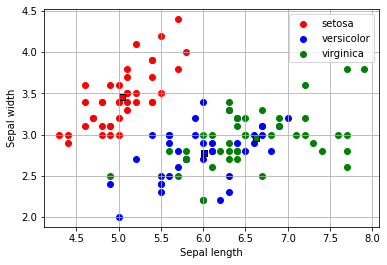

In [5]:
p = plt.subplot()

p.scatter(setosa_data[:,0], setosa_data[:,1], c = 'red')
p.scatter(versicolor_data[:,0], versicolor_data[:,1], c = 'blue')
p.scatter(virginica_data[:,0], virginica_data[:,1], c = 'green')

#p.scatter(setosa_centroids[:,0], setosa_centroids[:,1], c = 'red', marker='s', edgecolors='black')
#p.scatter(versicolor_centroids[:,0], versicolor_centroids[:,1], c = 'blue', marker='s', edgecolors='black')
#p.scatter(virginica_centroids[:,0], virginica_centroids[:,1], c = 'green', marker='s', edgecolors='black')
p.scatter(setosa_centroids[0], setosa_centroids[1], c = 'red', marker='s', edgecolors='black')
p.scatter(versicolor_centroids[0], versicolor_centroids[1], c = 'blue', marker='s', edgecolors='black')
p.scatter(virginica_centroids[0], virginica_centroids[1], c = 'green', marker='s', edgecolors='black')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.grid()
plt.legend(iris.target_names)

plt.show()

In [6]:
setosa_cov     = np.cov(setosa_data[:,:2], rowvar=False) # np.array([setosa_data.cov(rowvar=False)])
versicolor_cov = np.cov(versicolor_data[:,:2], rowvar=False) # np.array([versicolor_data.cov(rowvar=False)])
virginica_cov  = np.cov(virginica_data[:,:2], rowvar=False) # np.array([virginica_data.cov(rowvar=False)])

In [7]:
class ConfidenceEllipse:
    def __init__(self, data, p=0.95):
        self.data = data
        self.p = p

        self.means = np.mean(data, axis=0)
        self.cov = np.cov(data[:,0], data[:,1])

        lambdas, vecs = np.linalg.eigh(self.cov)
        order = lambdas.argsort()[::-1]
        lambdas, vecs = lambdas[order], vecs[:,order]

        c = np.sqrt(chi2.ppf(self.p, 2))
        self.w, self.h = 2 * c * np.sqrt(lambdas)
        self.theta = np.degrees(np.arctan(
            ((lambdas[0] - lambdas[1])/self.cov[0,1])))
        
    def get_params(self):
        return self.means, self.w, self.h, self.theta

    def get_patch(self, line_color="black", face_color="none", alpha=0):
        el = Ellipse(xy=self.means,
                     width=self.w, height=self.h,
                     angle=self.theta, color=line_color, alpha=alpha)
        el.set_facecolor(face_color)
        return el


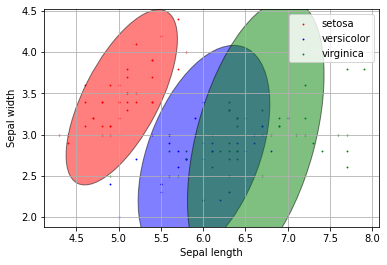

In [8]:
p = plt.subplot()

p.scatter(setosa_data[:,0], setosa_data[:,1], color="red", marker=".", s=3)
setosa_el = ConfidenceEllipse(setosa_data, p=0.95)
p.add_artist(setosa_el.get_patch(face_color="red", alpha=0.5))
p.scatter(versicolor_data[:,0], versicolor_data[:,1], color="blue", marker=".", s=3)
versicolor_el = ConfidenceEllipse(versicolor_data, p=0.95)
p.add_artist(versicolor_el.get_patch(face_color="blue", alpha=0.5))

p.scatter(virginica_data[:,0], virginica_data[:,1], color="green", marker=".", s=3)
virginica_el = ConfidenceEllipse(virginica_data, p=0.95)
p.add_artist(virginica_el.get_patch(face_color="green", alpha=0.5))

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.grid()
plt.legend(iris.target_names)

plt.show()

In [9]:
def calc(x, mu, sigma_inv, sigma_det):
    D = x.shape[0]
    exp = -0.5*(x - mu).T @ sigma_inv.T @ (x - mu)
    denomin = np.sqrt(sigma_det)*(np.sqrt(2*np.pi)**D)
    return np.exp(exp)/denomin

def gauss(X, mu, sigma):
    output = np.array([])
    eps = np.spacing(1)
    Eps = eps*np.eye(sigma.shape[0])
    sigma_inv = la.inv(sigma)
    sigma_det = la.det(sigma)
    N = X.shape[0]
    for i in range(N):
        output = np.append(output, calc(X[i], mu, sigma_inv, sigma_det))
    return output

def mix_gauss(X, Mu, Sigma, Pi):
    k = len(Mu)
    output = np.array([Pi[i]*gauss(X, Mu[i], Sigma[i]) for i in range(k)])
    return output, np.sum(output, 0)[None,:]

def setInitial(X, k):
    D = X.shape[1]
    Mu = np.random.randn(k, D)
    Sigma = np.array([np.eye(D) for i in range(k)])
    Pi = np.array([1/k for i in range(k)])
    return Mu, Sigma, Pi

def log_likelihood(X, Mu, Sigma, Pi):
    K = Mu.shape[0]
    D = X.shape[1]
    N = X.shape[0]
    _, out_sum = mix_gauss(X, Mu, Sigma, Pi)
    logs = np.array([np.log(out_sum[0][n]) for n in range(N)])
    return np.sum(logs)

def EM(X, k, Mu, Sigma, Pi, thr):
    K = Mu.shape[0]
    D = X.shape[1]
    N = X.shape[0]
    log_list = np.array([])
    log_list = np.append(log_list, log_likelihood(X, Mu, Sigma, Pi))
    count = 0
    while True:
        out_com, out_sum = mix_gauss(X, Mu, Sigma, Pi)
        gamma = out_com / out_sum
        N_k = np.sum(gamma, 1)[:,None]
        Mu = (gamma @ X) / N_k    
        sigma_list = np.zeros((N, K, D, D))
        for k in range(K):
            for n in range(N):
                sigma_com = gamma[k][n]*(X[n] - Mu[k])[:,None]@((X[n] - Mu[k]))[None,:]
                sigma_list[n][k] = sigma_com
        Sigma = np.sum(sigma_list, 0) / N_k[:,None]
        Pi = N_k/N
        
        log_list = np.append(log_list, log_likelihood(X, Mu, Sigma, Pi))
        if np.abs(log_list[count] - log_list[count+1]) < thr:
            return count+1, log_list, Mu, Sigma, Pi, gamma
        else:
            print("Previous log-likelihood gap:" + str(np.abs(log_list[count] - log_list[count+1])))
            count += 1

In [10]:
thr = 0.01
k = 3
Mu, Sigma, Pi = setInitial(iris.data[:,:2], k)
n_iter, log_list, Mu, Sigma, Pi, gamma = EM(iris.data[:,:2], k, Mu, Sigma, Pi, thr)
print("Iteration:"+str(n_iter))
print("log-likelihood:"+str(log_list))

Previous log-likelihood gap:3206.2440819219055
Previous log-likelihood gap:0.9790358075928225
Previous log-likelihood gap:2.6398210248650003
Previous log-likelihood gap:6.382895226628477
Previous log-likelihood gap:8.84109224506966
Previous log-likelihood gap:7.793360592287058
Previous log-likelihood gap:5.225547921288978
Previous log-likelihood gap:3.501173303992971
Previous log-likelihood gap:2.664702889706348
Previous log-likelihood gap:2.232683162421381
Previous log-likelihood gap:1.9729232442726357
Previous log-likelihood gap:1.6449457615141228
Previous log-likelihood gap:1.2451877329733065
Previous log-likelihood gap:0.9126654024784386
Previous log-likelihood gap:0.6572726782274287
Previous log-likelihood gap:0.45349848297485096
Previous log-likelihood gap:0.2978341902198167
Previous log-likelihood gap:0.19104385269270097
Previous log-likelihood gap:0.12486580730165997
Previous log-likelihood gap:0.0853657833013699
Previous log-likelihood gap:0.060787721224471625
Previous log-lik

In [11]:
params = np.array([Mu.ravel(), Sigma.ravel(), Pi.ravel()])
index = np.argmax(gamma, 0)

/home/takkan/miniconda3/envs/speech_split/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


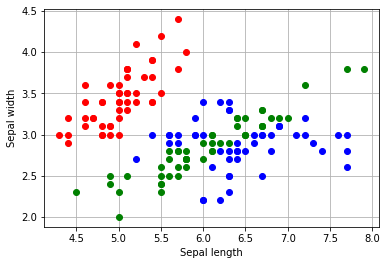

In [12]:
color_dict = ["red", "blue", "green"]
fig = plt.figure()
N = iris.data[:,:2].shape[0]

for n in range(N):
    plt.plot([iris.data[:,:2][n][0]], [iris.data[:,:2][n][1]],  "o", color=color_dict[index[n]])

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.grid()
plt.show()

In [13]:
print(index)
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 1 2 1 2 1 2 1 1 2 1 1 2 1 2 1 2 1 2 1 2 1 2
 1 1 1 1 2 2 2 2 2 2 1 1 2 1 1 2 2 2 2 2 2 1 1 2 2 2 1 2 1 2 2 1 2 1 1 2 2
 1 1 2 2 2 2 2 1 1 2 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2 1 2 2 2 1 1 2
 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
# 描画範囲の設定 (最小値, 最大値, 分割数の順に)
x, y = np.meshgrid(np.linspace(4, 8, 100), np.linspace(0, 5, 100))
z = np.dstack((x, y))

In [15]:
# 二変量正規分布の構築
setosa_pdf2 = multivariate_normal.pdf(z, setosa_centroids, setosa_cov) #範囲、平均、分散共分散の順
versicolor_pdf2 = multivariate_normal.pdf(z, versicolor_centroids, versicolor_cov)
virginica_pdf2 = multivariate_normal.pdf(z, virginica_centroids, virginica_cov)

/home/takkan/miniconda3/envs/speech_split/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


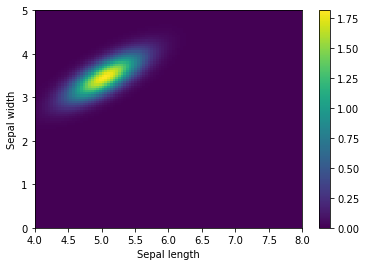

/home/takkan/miniconda3/envs/speech_split/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


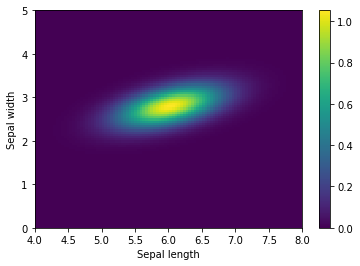

/home/takkan/miniconda3/envs/speech_split/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]


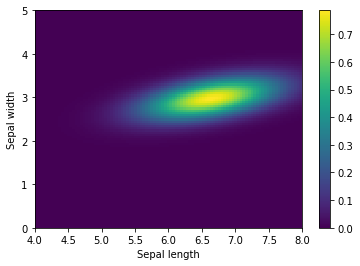

In [16]:
plt.pcolor(x, y, setosa_pdf2)
plt.colorbar()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

plt.pcolor(x, y, versicolor_pdf2)
plt.colorbar()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

plt.pcolor(x, y, virginica_pdf2)
plt.colorbar()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()